In [ ]:
import cv2 #computer vision library
import PIL #python imaging library
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from matplotlib import image as mpimg


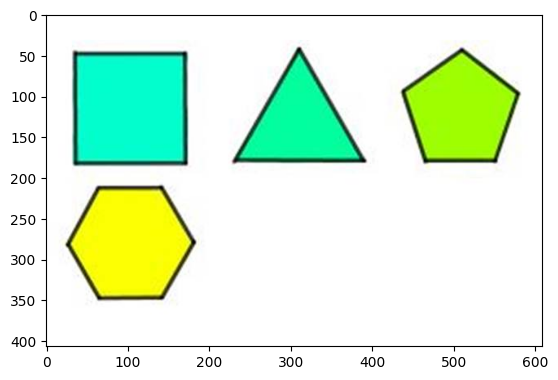

In [ ]:
img=Image.open("4 shapes3.jpeg")
plt.imshow(img)

In [ ]:
print(img.format)
print(img.size)
print(img.mode)


JPEG
(609, 407)
RGB


In [ ]:
img=np.array(img)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

NameError: name 'np' is not defined

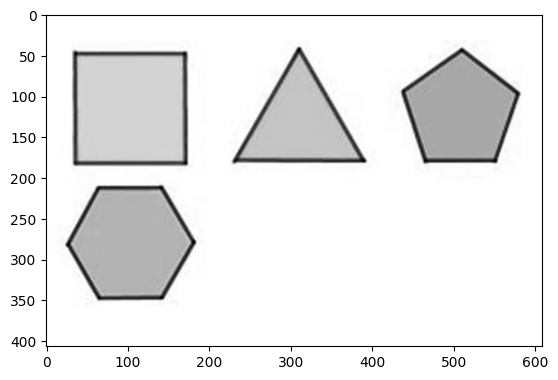

In [ ]:
plt.imshow(gray,cmap='gray')

In [ ]:
_,threshold=cv2.threshold(gray,110,255,cv2.THRESH_BINARY_INV)

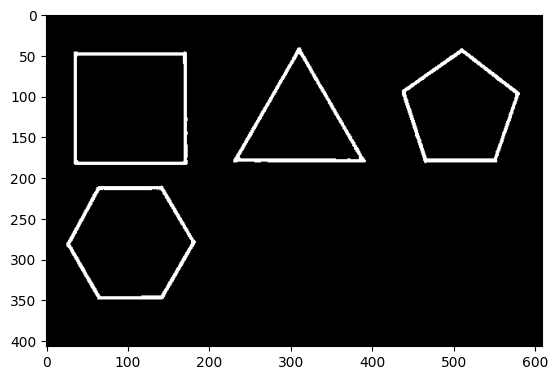

In [ ]:
plt.imshow(threshold, cmap='gray')


In [ ]:
#Different kernel matrices for some morphological operations.
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(4,4))
kernelc=cv2.getStructuringElement(cv2.MORPH_RECT,(6,6))
kernelo=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))


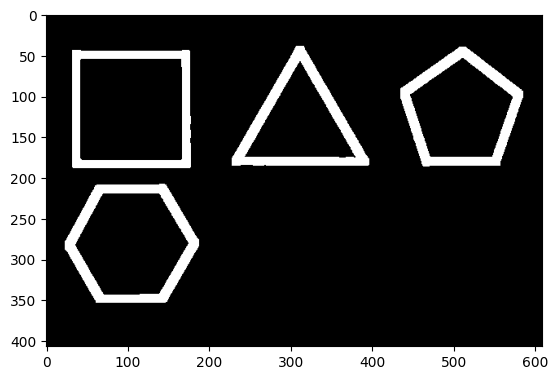

In [ ]:
#Dilation on threshold image output
dilated=cv2.dilate(threshold,kernel, iterations=2)
plt.imshow(dilated,cmap='gray')

In [ ]:
#connection of disjoining edges in the shape.
closed=cv2.morphologyEx(dilated,cv2.MORPH_CLOSE,kernelc, iterations=2)


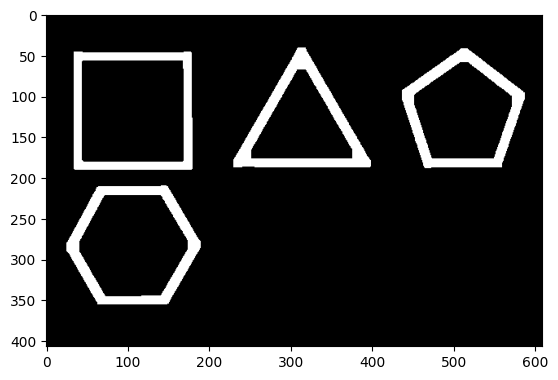

In [ ]:
plt.imshow(closed,cmap='gray')

In [ ]:
closed=cv2.morphologyEx(dilated,cv2.MORPH_CLOSE,kernelo, iterations=2)

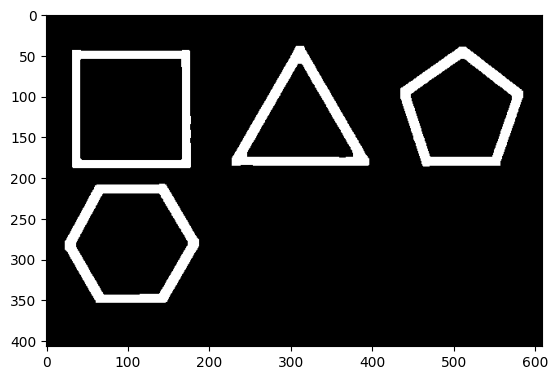

In [ ]:
plt.imshow(closed,cmap='gray')

In [ ]:
opening=cv2.morphologyEx(dilated,cv2.MORPH_OPEN,kernelo, iterations=2)

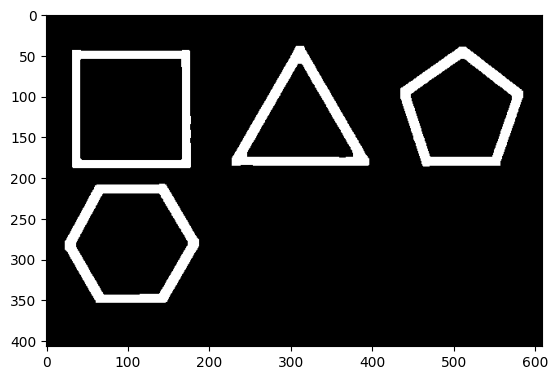

In [ ]:
plt.imshow(closed,cmap='gray')

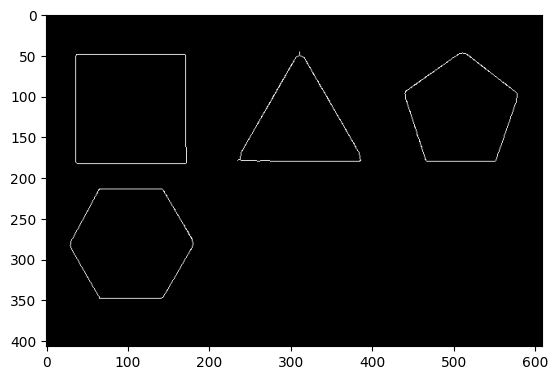

In [ ]:
thinned = cv2.ximgproc.thinning(opening)
plt.imshow(thinned,cmap='gray')

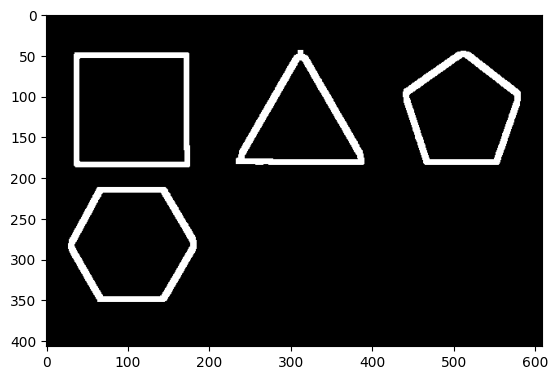

In [ ]:
dilated_t = cv2.dilate(thinned, kernel, iterations=2)
plt.imshow(dilated_t, cmap='gray')

In [ ]:
contours, _ = cv2.findContours(dilated_t, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [ ]:
i=0
#list for storing names of shapes
for contour in contours:

  #here we are ignoring first counter because
  #findcontour function detects whole image as shape
  if i==0:
    i=1
    continue
  approx = cv2.approxPolyDP(contour, 0.02*cv2.arcLength(contour,True),True)

  #to draw contours over the image
  cv2.drawContours(img, [contour] , 0 ,(0 , 0,255), 2)
  #centroid of each of the shape
  M= cv2.moments(contour)
  if M['m00'] != 0.0:
    x = int(M['m10']/M['m00'])
    y = int(M['m01']/M['m00'])

  #put name of shape
  if len(approx) == 3:
    cv2.putText(img,"Triangle",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),2)

  elif len(approx) == 4:
    cv2.putText(img,"Rectangle",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,255,0),2)
  elif len(approx) == 5:
    cv2.putText(img,"Pentagon",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255),2)
  elif len(approx) == 6:
    cv2.putText(img,"Hexagon",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,255),2)
  else :
    cv2.putText(img,"Circle",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255),2)

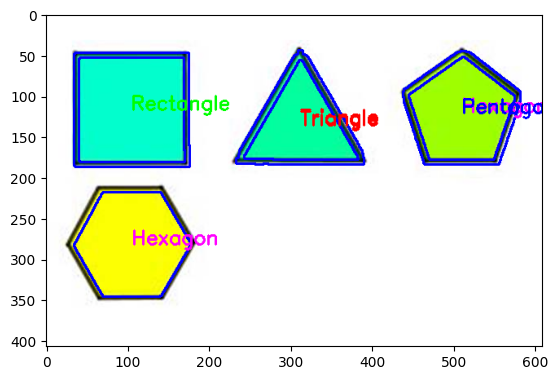

In [ ]:
plt.imshow(img)